**Analisis EDA Netflix**

**Librerias y Gráficos**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Configuraciones visuales
plt.style.use("ggplot")
sns.set_palette("Set2")

In [5]:
# Cargar el dataset
df = pd.read_csv("C:\\Users\\usuario\\Desktop\\DATA_SCIENCE_RAUL_URIBE\\MACHINE_LEARNING\\netflix_titles.csv")

In [6]:
# Vista general del dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**2. Limpieza de datos**


In [7]:
# Revisar valores nulos
df.isnull().sum()




show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
# Convertir 'date_added' a formato datetime, forzando errores a NaT
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Crear columna con el año en que se agregó a Netflix
df['year_added'] = df['date_added'].dt.year


In [9]:
df['date_added'].isnull().sum()


98

**3. Distribución por tipo de contenido**

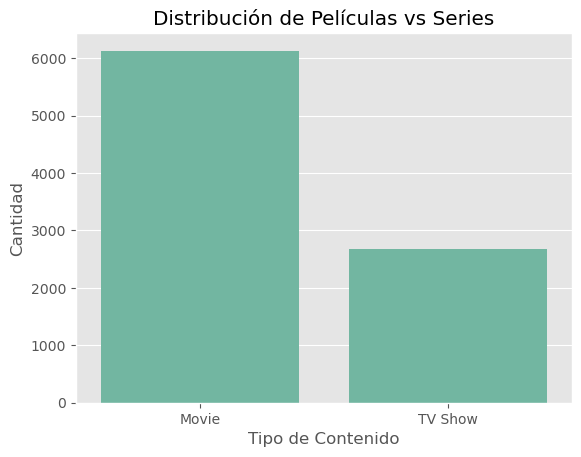

In [10]:
sns.countplot(data=df, x='type')
plt.title('Distribución de Películas vs Series')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad')
plt.show()


**4. Contenido por país (Top 10)**

C:\Users\usuario\AppData\Local\Temp\ipykernel_15420\3843880449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['country'] = df_country['country'].apply(lambda x: x.split(',')[0])


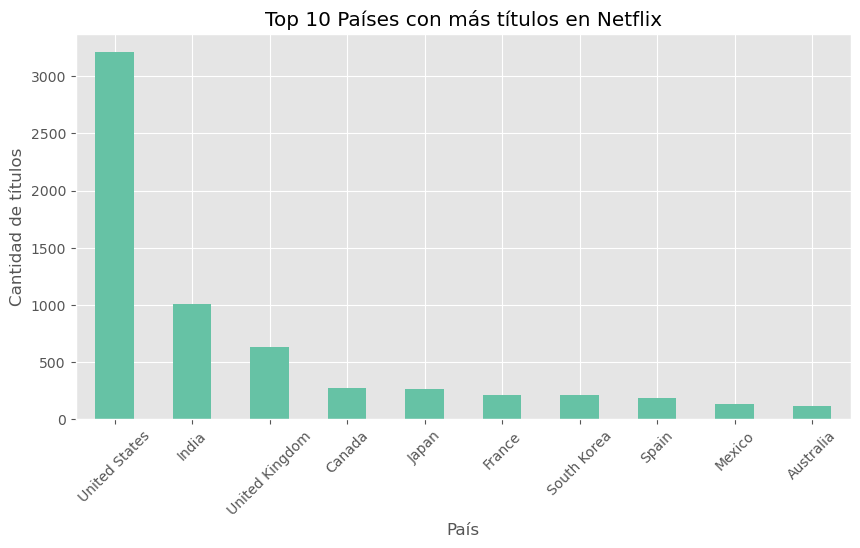

In [11]:
# Separar múltiples países en registros separados
df_country = df.dropna(subset=['country'])
df_country['country'] = df_country['country'].apply(lambda x: x.split(',')[0])
top_countries = df_country['country'].value_counts().head(10)

top_countries.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Países con más títulos en Netflix')
plt.xlabel('País')
plt.ylabel('Cantidad de títulos')
plt.xticks(rotation=45)
plt.show()


**5. Evolución de lanzamientos por año en Netflix**

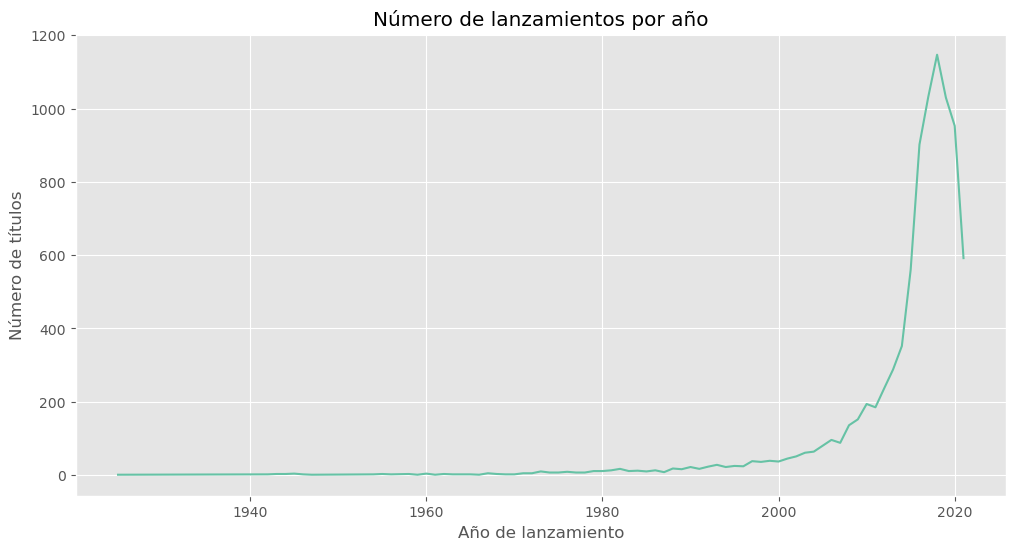

In [19]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,6))
plt.title('Número de lanzamientos por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de títulos')
plt.grid(True)
plt.show()



**6. Géneros más comunes**

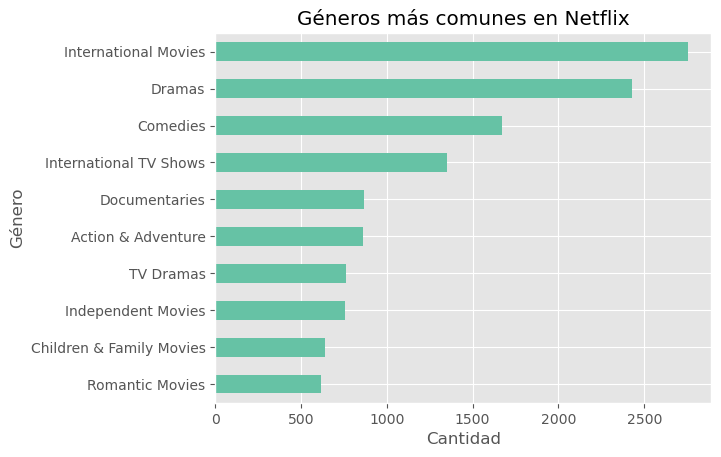

In [13]:
from collections import Counter

genres = df['listed_in'].dropna().apply(lambda x: x.split(', '))
genre_counts = Counter([genre for sublist in genres for genre in sublist])
top_genres = pd.Series(genre_counts).sort_values(ascending=False).head(10)

top_genres.plot(kind='barh')
plt.title('Géneros más comunes en Netflix')
plt.xlabel('Cantidad')
plt.ylabel('Género')
plt.gca().invert_yaxis()
plt.show()


**7. Duración más común en Películas**

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\usuario\AppData\Local\Temp\ipykernel_15420\3311360696.py:2: SyntaxWarning: invalid escape sequence '\d'
  movies['duration'] = movies['duration'].str.extract('(\d+)').astype(float)


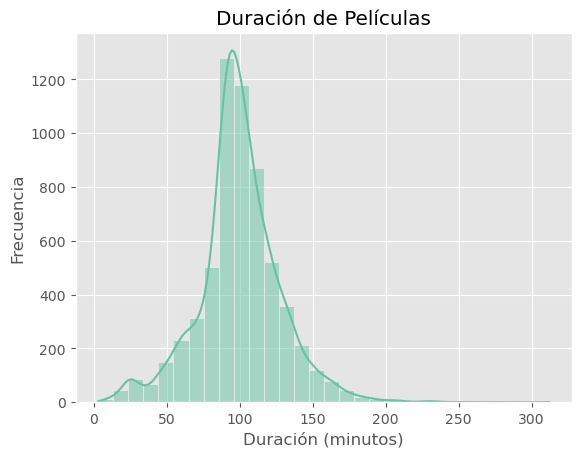

In [14]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration'] = movies['duration'].str.extract('(\d+)').astype(float)

sns.histplot(movies['duration'], bins=30, kde=True)
plt.title('Duración de Películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()


**8. Duración más común en Series**

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\usuario\AppData\Local\Temp\ipykernel_15420\3470534167.py:2: SyntaxWarning: invalid escape sequence '\d'
  tv_shows['duration'] = tv_shows['duration'].str.extract('(\d+)').astype(float)


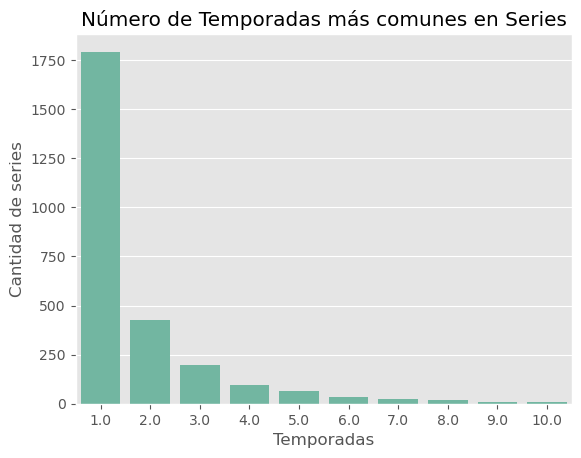

In [15]:
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['duration'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

sns.countplot(data=tv_shows, x='duration', order=tv_shows['duration'].value_counts().index[:10])
plt.title('Número de Temporadas más comunes en Series')
plt.xlabel('Temporadas')
plt.ylabel('Cantidad de series')
plt.show()


**9. Directores más frecuentes**

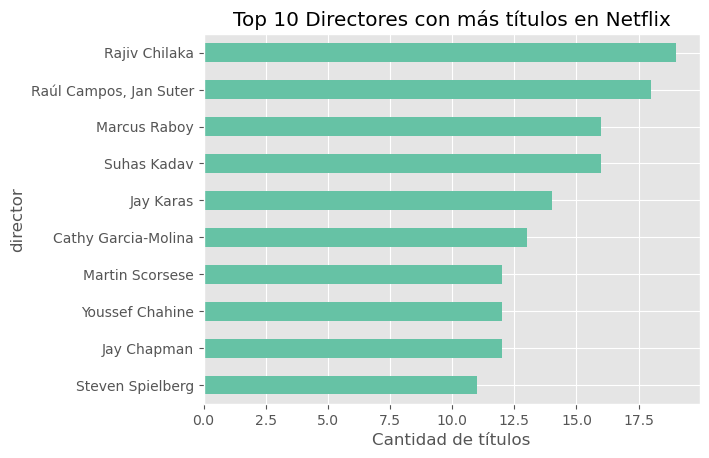

In [16]:
top_directors = df['director'].dropna().value_counts().head(10)

top_directors.plot(kind='barh')
plt.title('Top 10 Directores con más títulos en Netflix')
plt.xlabel('Cantidad de títulos')
plt.gca().invert_yaxis()
plt.show()


**10. Heatmap de correlación entre tipo, país y género**

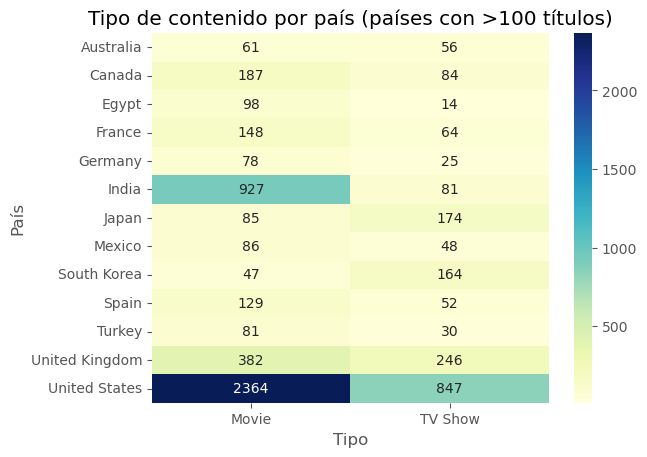

In [17]:
pivot_table = pd.crosstab(df_country['country'], df_country['type'])
pivot_table = pivot_table.loc[pivot_table.sum(axis=1) > 100]

sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='d')
plt.title('Tipo de contenido por país (países con >100 títulos)')
plt.xlabel('Tipo')
plt.ylabel('País')
plt.show()
